In [50]:
#!python2
"""
Add bounding boxes and control signals to videos
"""
import os
import pickle
import argparse

import cv2
import numpy as np

from utils.utils import *
from utils.data_utils import find_time_match_info

if __name__ == '__main__':
    
    # read info list
    dir_name = "C:\\Users\\bair\\Desktop\\clip2"

    if not os.path.exists(os.path.join(dir_name, 'info_match.p')):
        find_time_match_info(dir_name)
    info_dict_list = pickle.load(
        open(
            os.path.join(
                dir_name,
                'info_match.p'),
            'rb'))
    add_info_panel = True
    add_vehicle_bbox = True
    add_ped_bbox = False
    add_vehicle_cube = True
    add_vehicle_info = False
    add_vehicle_head = False  # deprecated
    add_ped_cube = True
    add_collide_info = False
    add_vec_bbox_from_id_map = False
    colormap = {92178:(246,182,41),143122:(41,182,246)}
    ins_count = 0
    write_count=1
    # correspond to classID key.
    vec_class = {
        0: "car",
        1: "bike",
        2: "bicycle",
        3: "quadbike",
        4: "boat",
        5: "plane",
        6: "helicopter",
        7: "train",
        8: "submersible",
        9: "unknown"
    }

    plot_list1 = []
    plot_list2 = []
    vertex_idx = [[0, 1],
                  [0, 3],
                  [1, 2],
                  [2, 3],
                  [4, 5],
                  [4, 7],
                  [5, 6],
                  [6, 7],
                  [0, 6],
                  [1, 7],
                  [2, 4],
                  [3, 5],
                  [2, 7],
                  [1, 4]]
    timeseries = sorted(info_dict_list)
    for ts in ts_list:
        info = info_dict_list[ts]
        frame = cv2.imread(os.path.join(dir_name, str(ts) + '_final.png'))
        # time.sleep(0.2)
        ori_frame = frame.copy()
        if add_info_panel:
            # add info to visualize
            panel_coord = [20, 20, 280, 300]
            cv2.rectangle(
                frame, (panel_coord[0], panel_coord[1]),
                (panel_coord[2], panel_coord[3]), (0, 0, 0), -1)
            left_x1 = 60  # for title
            left_x2 = 230  # for value
            top_y = 70
            pad_y = 40
            n_digit = 2
            font_size = 1.0

            font = cv2.FONT_HERSHEY_DUPLEX
            speed = info['speed']
            #cv2.putText(frame, 'speed: ', (left_x1, top_y), font,
            #            font_size, (255, 255, 255), 1, cv2.LINE_AA)
            #cv2.putText(frame, '%05.02f' % (speed), (left_x2, top_y),
            #            font, font_size, (255, 255, 255), 1, cv2.LINE_AA)
            top_y = top_y + pad_y

            throttle = info['throttle']
            #cv2.putText(frame, 'throttle: ', (left_x1, top_y), font,
            #            font_size, (255, 255, 255), 1, cv2.LINE_AA)
            #cv2.putText(
            #    frame, '%05.02f' %
            #           (throttle), (left_x2, top_y), font, font_size,
            #    (255, 255, 255),
            #    1, cv2.LINE_AA)
            top_y = top_y + pad_y

            brake = info['brake']
            #cv2.putText(frame, 'brake: ', (left_x1, top_y), font,
            #            font_size, (255, 255, 255), 1, cv2.LINE_AA)
            #cv2.putText(frame, '%05.02f' % (brake), (left_x2, top_y),
            #            font, font_size, (255, 255, 255), 1, cv2.LINE_AA)
            top_y = top_y + pad_y

            steering = info['steering']
            if steering == 0:
                str_st = '00.00'
            elif steering > 0:
                str_st = '+' + '%04.02f' % (steering)
            else:
                str_st = '-' + '%04.02f' % (np.abs(steering))
            #cv2.putText(frame, 'steering: ', (left_x1, top_y), font,
            #            font_size, (255, 255, 255), 1, cv2.LINE_AA)
            #cv2.putText(frame, str_st, (left_x2, top_y), font,
            #            font_size, (255, 255, 255), 1, cv2.LINE_AA)
            top_y = top_y + pad_y
            
            # draw the four direction key visualization
            init_gap = 0
            block_gap = 75
            block_size = 60

            top_y = 70

            total_width = block_gap * 2 + block_size
            left_bound = int(
                (panel_coord[2] -
                 panel_coord[0] -
                 total_width) /
                2 +
                panel_coord[0])

            if throttle > 0:
                cv2.rectangle(frame, (left_bound +
                                      block_gap, top_y), (left_bound +
                                                          block_gap +
                                                          block_size, top_y +
                                                          block_size),
                              (255, 255, 255), -1)  # up
            else:
                cv2.rectangle(frame, (left_bound +
                                      block_gap, top_y), (left_bound +
                                                          block_gap +
                                                          block_size, top_y +
                                                          block_size),
                              (30, 30, 30), -1)  # up

            if brake > 0:
                cv2.rectangle(frame, (left_bound +
                                      block_gap, top_y +
                                      block_gap), (left_bound +
                                                   block_gap +
                                                   block_size, top_y +
                                                   block_gap +
                                                   block_size),
                              (255, 255, 255), -1)  # down
            else:
                cv2.rectangle(frame, (left_bound +
                                      block_gap, top_y +
                                      block_gap), (left_bound +
                                                   block_gap +
                                                   block_size, top_y +
                                                   block_gap +
                                                   block_size),
                              (30, 30, 30), -1)  # down
            if steering < 0:
                cv2.rectangle(frame, (left_bound, top_y +
                                      block_gap), (left_bound +
                                                   block_size, top_y +
                                                   block_gap +
                                                   block_size),
                              (255, 255, 255), -1)  # left
            else:
                cv2.rectangle(frame, (left_bound, top_y +
                                      block_gap), (left_bound +
                                                   block_size, top_y +
                                                   block_gap +
                                                   block_size),
                              (30, 30, 30), -1)  # left
            if steering > 0:
                cv2.rectangle(frame, (left_bound +
                                      2 *
                                      block_gap, top_y +
                                      block_gap), (left_bound +
                                                   block_gap *
                                                   2 +
                                                   block_size, top_y +
                                                   block_gap +
                                                   block_size),
                              (255, 255, 255), -1)  # right
            else:
                cv2.rectangle(frame, (left_bound +
                                      2 *
                                      block_gap, top_y +
                                      block_gap), (left_bound +
                                                   block_gap *
                                                   2 +
                                                   block_size, top_y +
                                                   block_gap +
                                                   block_size),
                              (30, 30, 30), -1)  # right

            opacity = 0.8
            cv2.addWeighted(frame, opacity, ori_frame, 1 - opacity, 0, frame)

        if add_vehicle_cube:
            v_list = info['vehicles']
            cam_coords = np.array(info['cam_coords'], 'double')
            cam_rotation = np.array(info['cam_rotation'], 'double')
            cam_near_clip = np.array(info['cam_near_clip'], 'double')
            cam_field_of_view = np.array(info['cam_field_of_view'], 'double')

            if add_vehicle_bbox:
                info_vec_bbox_list = []
            
            timeloc = timeseries.index(ts)
            succloc = []
            for succtime in range(timeloc,timeloc+30):
                if succtime%2==0:
                    succtime = timeseries[succtime]
                    succloc.append(info_dict_list[succtime]['location'])
                    
            for (idx,loc) in enumerate(succloc):
                beforeplane = is_before_clip_plane(
                    loc, cam_coords, cam_rotation, cam_near_clip,
                    cam_field_of_view)
                loc_p = get_2d_from_3d(
                        loc, cam_coords, cam_rotation, cam_near_clip,
                        cam_field_of_view)
                ori_frame = frame.copy()
                if beforeplane:
                    cv2.circle(frame,(int(loc_p[0]*1920),int(loc_p[1]*1080)), int(-2*idx+40), 
                                (255,255,255), -1)
                    opacity = 0.4
                    cv2.addWeighted(frame, opacity, ori_frame, 1 - opacity, 0, frame)
            
            if len(v_list) > 0:
                for j in range(len(v_list)):
                    v_info = v_list[j]
                    visible = v_info['visible']
                    dist = get_depth(
                                v_info['your_pos'],
                                cam_coords,
                                cam_rotation,
                                cam_near_clip,
                                cam_field_of_view)
                    if dist>80:
                        continue
                    if not visible:
                        continue
                    if not v_info['classID'] == 0:
                        continue
                    if v_info['arrID'] in colormap:
                        line_color = colormap[v_info['arrID']]
                    else:
                        color_ins = current_palette[ins_count+2]
                        line_color = (int(color_ins[0]*255),int(color_ins[1]*255)
                                      ,int(color_ins[2]*255))
                        ins_count+=1
                        colormap[v_info['arrID']]=line_color
                    xxx = v_info['xxx']
                    yyy = v_info['yyy']
                    zzz = v_info['zzz']
                    
                    line_width = 6

                    dd_x = []
                    dd_y = []
                    
                    timeloc = timeseries.index(ts)
                    prevloc = []
                   
                    for prevtime in range(timeloc-30,timeloc):
                        if prevtime%2==0:
                            prevtime = timeseries[prevtime]
                            prevvlist = info_dict_list[prevtime]['vehicles']
                            for prevv_info in prevvlist:
                                if prevv_info['arrID'] == v_info['arrID']:
                                    prevloc.append(prevv_info['your_pos'])                            
                    
                    for (idx,loc) in enumerate(prevloc):
                        beforeplane = is_before_clip_plane(
                            loc, cam_coords, cam_rotation, cam_near_clip,
                            cam_field_of_view)
                        loc_p = get_2d_from_3d(
                                loc, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                        ori_frame = frame.copy()
                        print(dist)
                        if beforeplane:
                            cv2.circle(frame,(int(loc_p[0]*1920),int(loc_p[1]*1080)), int(0.5*idx+10), 
                                   line_color, -1)
                            opacity = 0.6
                            cv2.addWeighted(frame, opacity, ori_frame, 1 - opacity, 0, frame)

                    for i in range(len(vertex_idx)):
                        idx = vertex_idx[i]
                        idx1 = idx[0]
                        idx2 = idx[1]
                        p1 = np.array(
                            [xxx[idx1], yyy[idx1], zzz[idx1]], 'double')
                        p2 = np.array(
                            [xxx[idx2], yyy[idx2], zzz[idx2]], 'double')
                        before1 = is_before_clip_plane(
                            p1, cam_coords, cam_rotation, cam_near_clip,
                            cam_field_of_view)
                        before2 = is_before_clip_plane(
                            p2, cam_coords, cam_rotation, cam_near_clip,
                            cam_field_of_view)

                        if not (before1 or before2):
                            continue
                        if before1 and before2:
                            cp1 = get_2d_from_3d(
                                p1, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                            cp2 = get_2d_from_3d(
                                p2, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                            x1 = int(cp1[0] * 1920)
                            x2 = int(cp2[0] * 1920)
                            y1 = int(cp1[1] * 1080)
                            y2 = int(cp2[1] * 1080)
                            if line_width > 0:
                                cv2.line(
                                    frame, (x1, y1), (x2, y2), line_color,
                                    line_width)

                            min_x, max_x, min_y, max_y = \
                                get_min_max_x_y_from_line(
                                    cp1[0], cp1[1], cp2[0], cp2[1])
                            if min_x is not None:
                                dd_x.append(min_x)
                                dd_x.append(max_x)
                                dd_y.append(min_y)
                                dd_y.append(max_y)
                            continue

                        center_pt, cam_dir = get_clip_center_and_dir(
                            cam_coords, cam_rotation, cam_near_clip)

                        if before1 and not before2:
                            inter2 = get_intersect_point(
                                center_pt, cam_dir, p1, p2)
                            cp1 = get_2d_from_3d(
                                p1, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                            cp2 = get_2d_from_3d(
                                inter2, cam_coords, cam_rotation,
                                cam_near_clip, cam_field_of_view)
                            # print p1, p2, inter2, (inter2 -
                            # center_pt).dot(cam_dir), cp1, cp2
                            x1 = int(cp1[0] * 1920)
                            x2 = int(cp2[0] * 1920)
                            y1 = int(cp1[1] * 1080)
                            y2 = int(cp2[1] * 1080)
                            if line_width > 0:
                                cv2.line(
                                    frame, (x1, y1), (x2, y2), line_color,
                                    line_width)

                            min_x, max_x, min_y, max_y = \
                                get_min_max_x_y_from_line(
                                    cp1[0], cp1[1], cp2[0], cp2[1])
                            if min_x is not None:
                                dd_x.append(min_x)
                                dd_x.append(max_x)
                                dd_y.append(min_y)
                                dd_y.append(max_y)
                            continue

                        if before2 and not before1:
                            inter1 = get_intersect_point(
                                center_pt, cam_dir, p1, p2)
                            cp2 = get_2d_from_3d(
                                p2, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                            cp1 = get_2d_from_3d(
                                inter1, cam_coords, cam_rotation,
                                cam_near_clip, cam_field_of_view)
                            # print p1, p2, inter1, (inter1 -
                            # center_pt).dot(cam_dir), cp2, cp1
                            x1 = int(cp1[0] * 1920)
                            x2 = int(cp2[0] * 1920)
                            y1 = int(cp1[1] * 1080)
                            y2 = int(cp2[1] * 1080)
                            if line_width > 0:
                                cv2.line(
                                    frame, (x1, y1), (x2, y2), line_color,
                                    line_width)

                            min_x, max_x, min_y, max_y = \
                                get_min_max_x_y_from_line(
                                    cp1[0], cp1[1], cp2[0], cp2[1])
                            if min_x is not None:
                                dd_x.append(min_x)
                                dd_x.append(max_x)
                                dd_y.append(min_y)
                                dd_y.append(max_y)
                            continue

        cv2.imwrite(join(dir_name,str(write_count)+'.png'),frame)
        write_count+=1


17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
17.7987395541
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
34.2125346672
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
73.4246222285
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
15.5974263886
20.2957270667
20.2957270667
20.2957270667
20.2957270667
20.2957270667
20.2957270667
20.2957270667
20.2957270667
20.2957270667
20.2957270667
20.2957270667
20.295

In [42]:
line_color

'#2196F3'

In [1]:
from utils.data_utils import find_time_match_info
import os,pickle
dir_name = "C:\\Users\\bair\\Desktop\\clip2"
if not os.path.exists(os.path.join(dir_name, 'info_match.p')):
    find_time_match_info(dir_name)
info_dict_list = pickle.load(
    open(
        os.path.join(
            dir_name,
            'info_match.p'),
        'rb'))

In [2]:
for i in info_dict_list:
    print(type(i))
    break

<class 'int'>


In [3]:
from glob import glob

In [4]:
from os.path import join

In [5]:
files = glob(join(dir_name,'*_final.png'))

In [6]:
ts_list = []
for i in files:
    ts_list.append(int(i.split('\\')[-1].split("_final")[0]))

In [7]:
ts_list

[1517737024115,
 1517737027133,
 1517737030112,
 1517737033108,
 1517737036110,
 1517737039117]

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
from matplotlib import cm

In [10]:
cm.Set2.to_rgba(10,n)

AttributeError: 'ListedColormap' object has no attribute 'to_rgba'

In [11]:
cmap = cm.ScalarMappable(cmap="Set2")

In [12]:
cmap.to_rgba(x=(1,2,3,4,5),bytes=True)

array([[102, 194, 165, 255],
       [141, 160, 203, 255],
       [166, 216,  84, 255],
       [229, 196, 148, 255],
       [179, 179, 179, 255]], dtype=uint8)

In [13]:
line_color

NameError: name 'line_color' is not defined

In [14]:
import seaborn as sns
current_palette = sns.color_palette()
sns.palplot(current_palette)

<IPython.core.display.Javascript object>

In [19]:
current_palette[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [20]:
current_palette[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [21]:
colormap

NameError: name 'colormap' is not defined

In [22]:
for ts in sorted(info_dict_list):
    info = info_dict_list[ts]
    break

In [23]:
timeseries = sorted(info_dict_list)

In [24]:
timeseries.index(1517355621583)

ValueError: 1517355621583 is not in list

In [25]:
ts_list = ts_list[-3:]

<IPython.core.display.Javascript object>


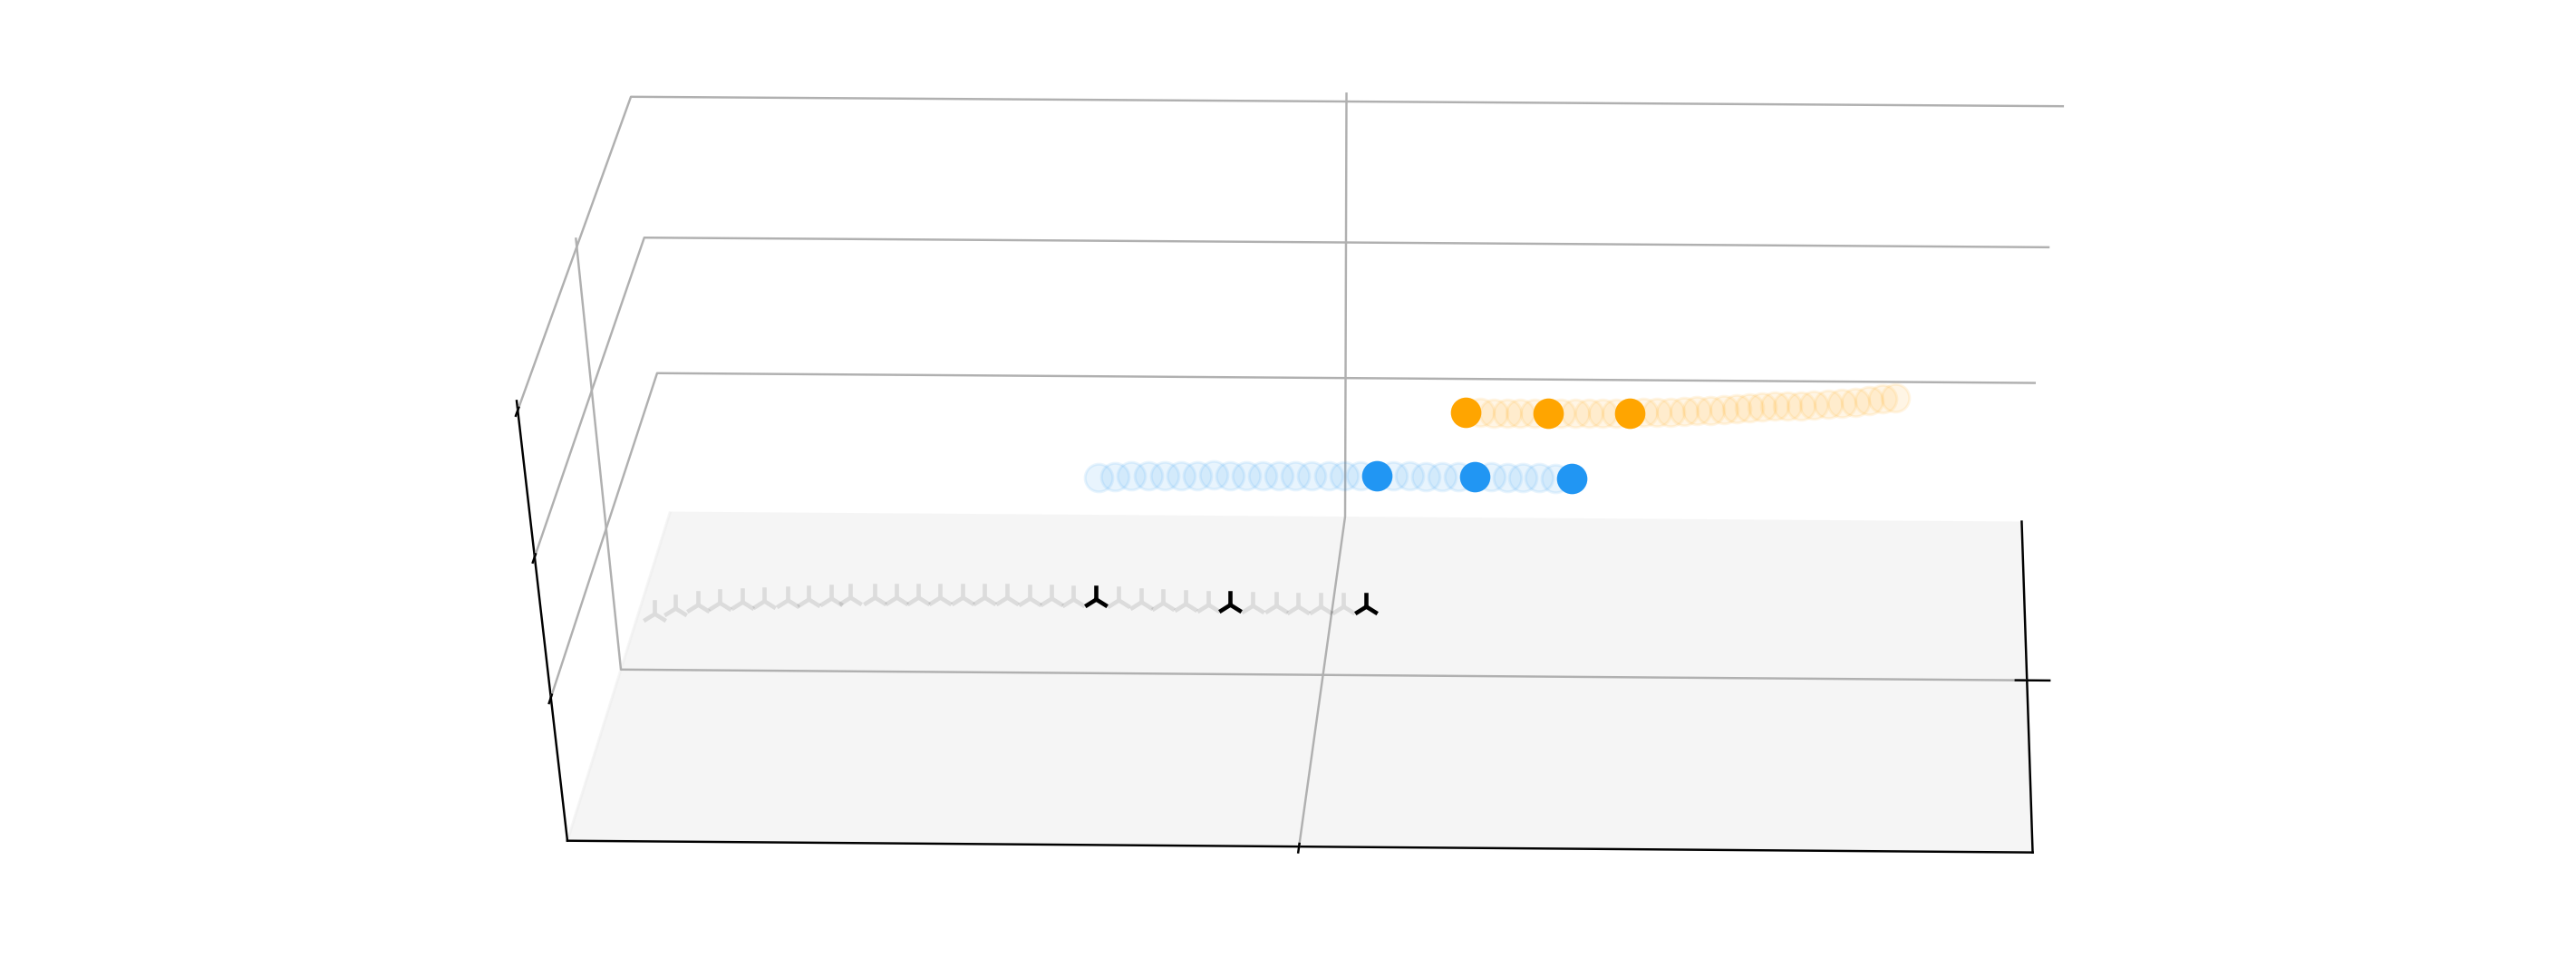

<IPython.core.display.Javascript object>


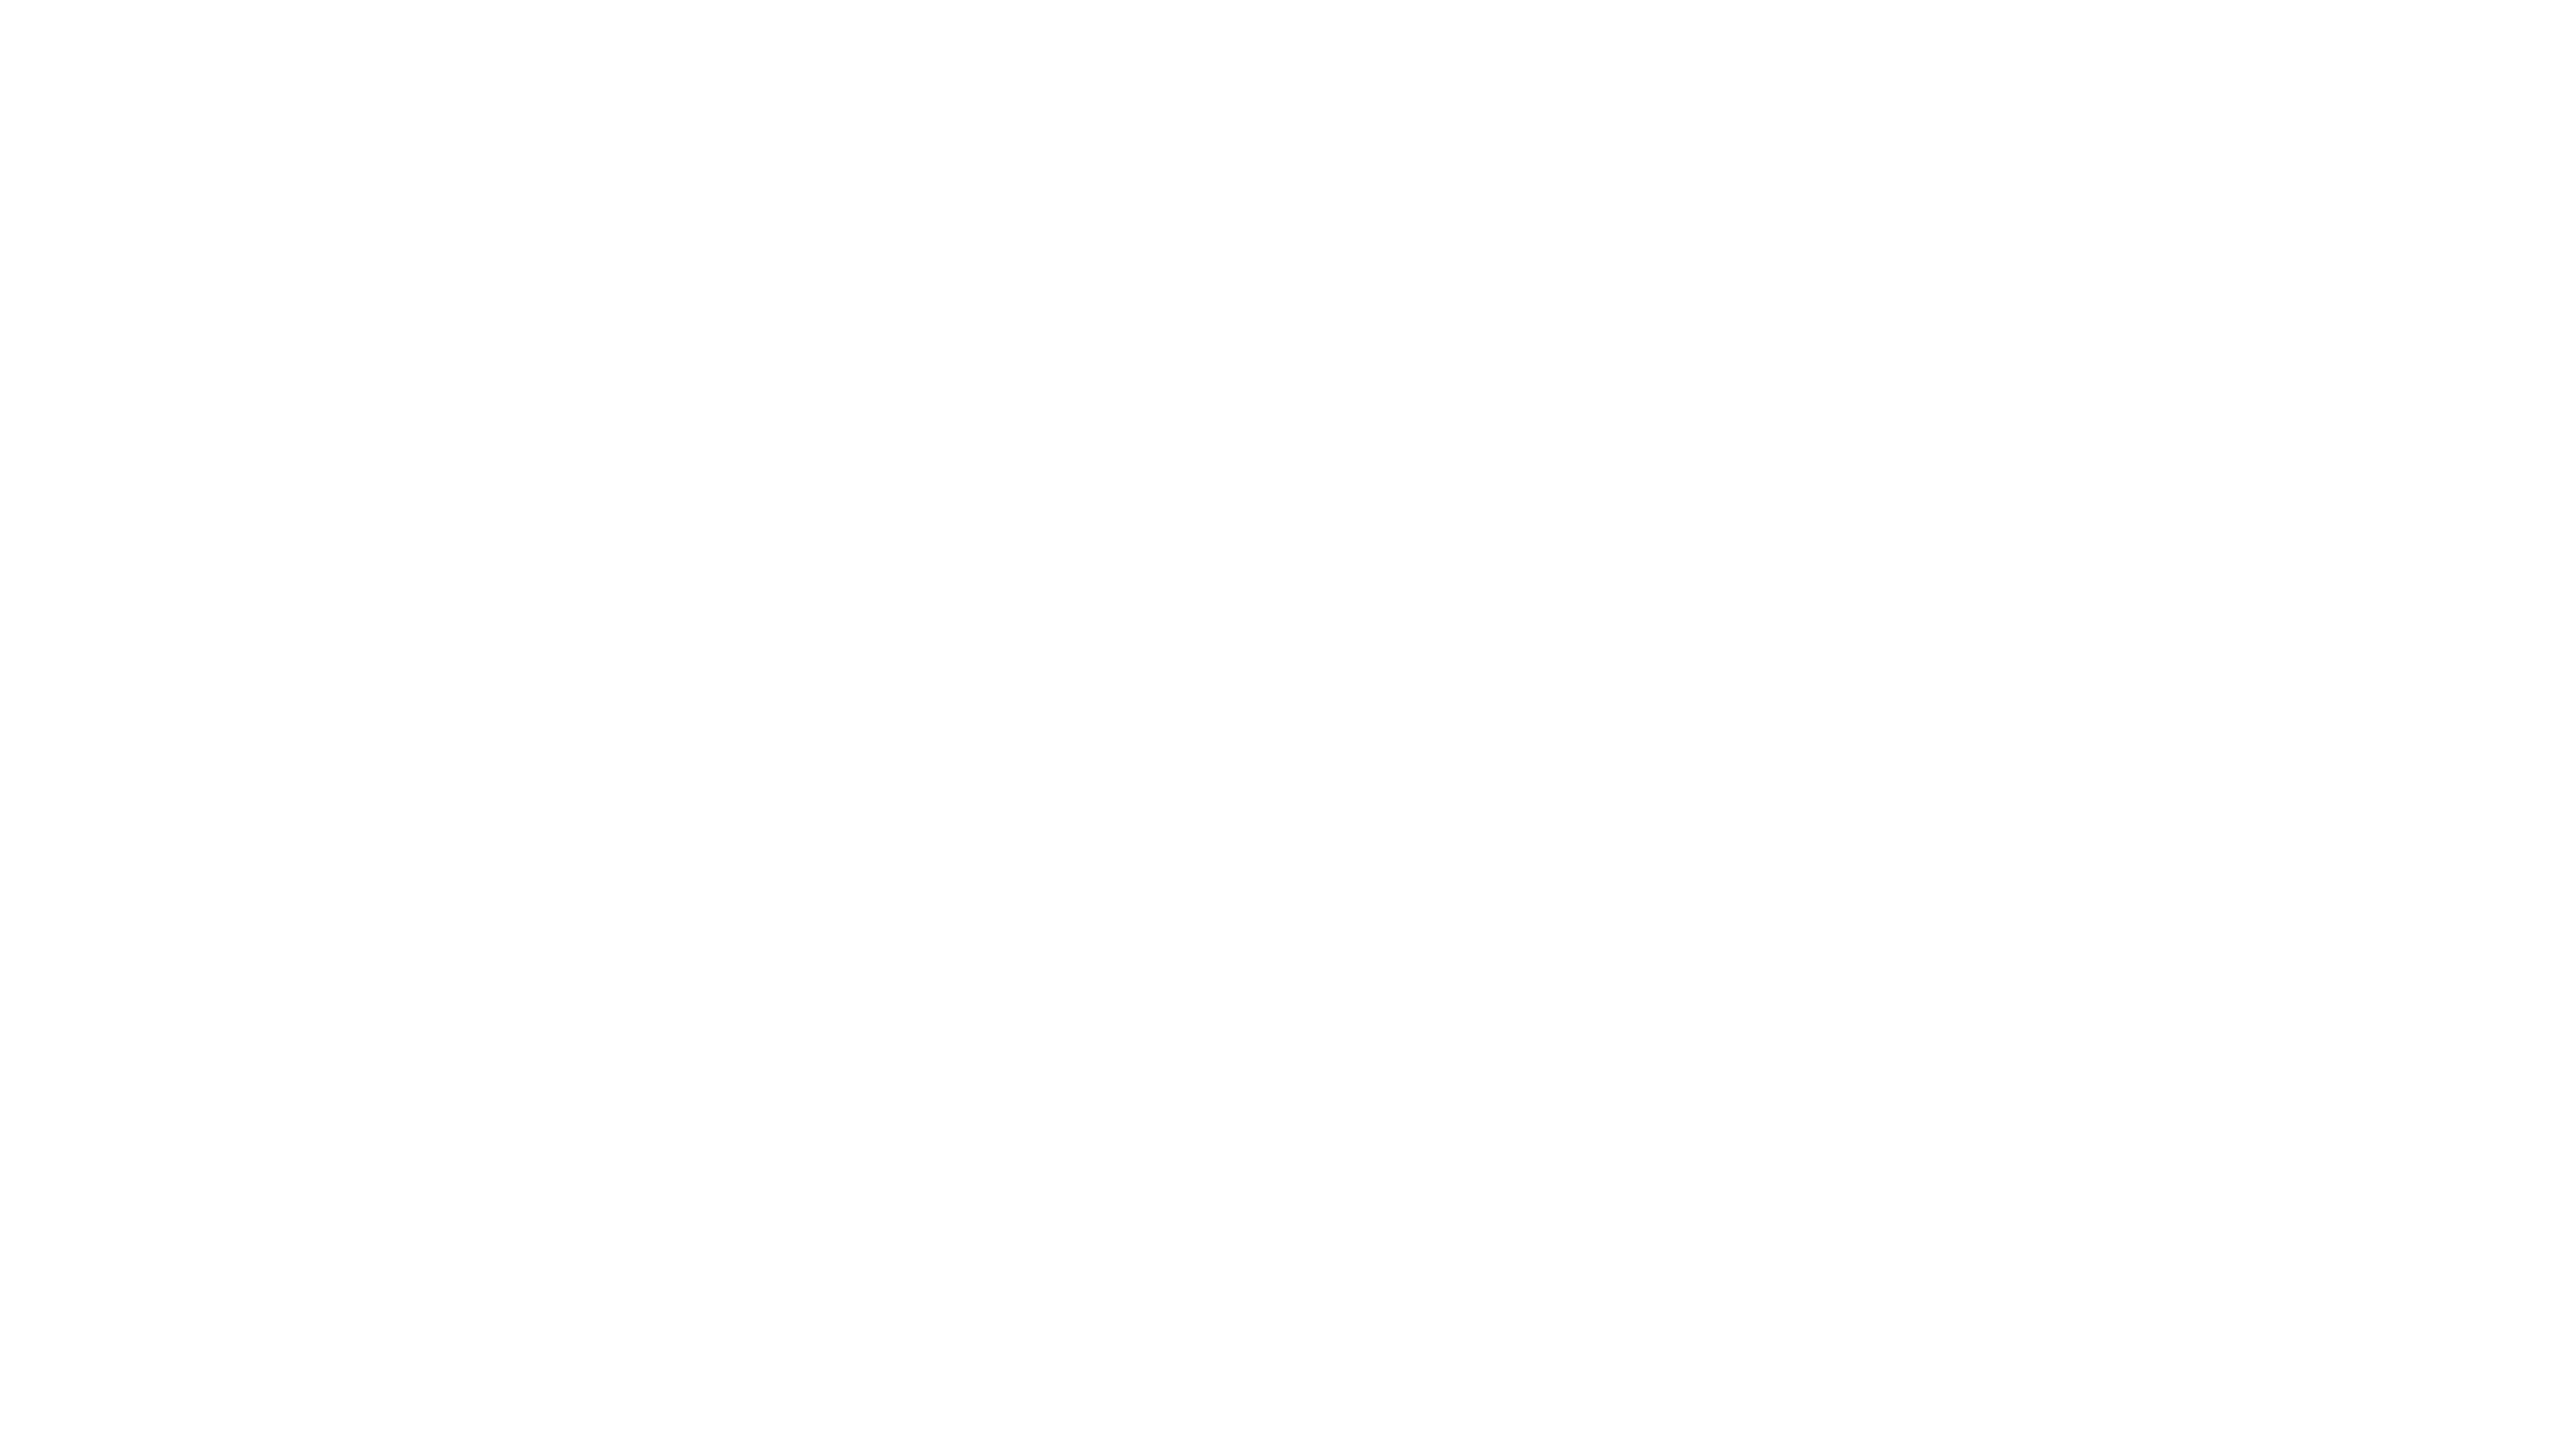

In [35]:
#!python2
"""
Another visualization
"""

import os
import pickle
import argparse

import cv2
import matplotlib.pyplot as plt
import numpy as np

from utils.utils import *
from utils.data_utils import find_time_match_info
from mpl_toolkits.mplot3d import Axes3D

def get_rotation_y(cam_rotation, xxx, yyy, zzz):
    cam_dir, cam_up, cam_east = get_cam_dir_vecs(cam_rotation)
    p_forward = np.array([xxx[1], yyy[1], zzz[1]], 'double')
    p_backward = np.array([xxx[0], yyy[0], zzz[0]], 'double')
    incam_forward_vec1 = get_kitti_format_camera_coords(
        p_forward, cam_coords, cam_rotation, cam_near_clip)
    incam_forward_vec2 = get_kitti_format_camera_coords(
        p_backward, cam_coords, cam_rotation, cam_near_clip)
    incam_forward_vec = incam_forward_vec1 - incam_forward_vec2
    cos_x = vec_cos(incam_forward_vec[[0, 2]], np.array([1, 0]))
    cos_z = vec_cos(incam_forward_vec[[0, 2]], np.array([0, 1]))

    rot = np.arccos(cos_x)  # 0 - pi
    if cos_z > 0:
        rot = - rot
    return rot


def get_random_color():
    color = [np.random.rand() for _ in range(3)]
    return tuple(color)


def fig2data(fig):
    # ax = fig.gca().axis('off')
    fig.canvas.draw()

    w, h = fig.canvas.get_width_height()
    buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)

    buf.shape = (h, w, 4)
    # buf = buf[:, :, 1:]

    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to
    # have it in RGBA mode
    buf = np.roll(buf, 3, axis=2)
    buf = cv2.resize(buf[:, :, :3], (1920, 1080))
    return buf


if __name__ == '__main__':
    # read info list
    #dir_name = args.base_dir + args.folder_name
    map_type = 'id'
    figure = plt.figure()
    ax=Axes3D(figure)
    if not os.path.exists(os.path.join(dir_name, 'info_match.p')):
        find_time_match_info(dir_name)
    info_dict_list = pickle.load(
        open(
            os.path.join(
                dir_name,
                'info_match.p'),
            'rb'))

    # correspond to classID key.
    vec_class = {
        0: "car",
        1: "bike",
        2: "bicycle",
        3: "quadbike",
        4: "boat",
        5: "plane",
        6: "helicopter",
        7: "train",
        8: "submersible",
        9: "unknown"
    }
    # the order of the vertices: (suppose the vehicle is moving forward)
    # the upper 4 vertices: 2 4
    #                       3 5
    # the lower 4 vertices: 1 7
    #                       0 6
    vertex_idx = [[0, 1],  # l
                  [0, 3],  # h
                  [1, 2],
                  [2, 3],
                  [4, 5],
                  [4, 7],
                  [5, 6],
                  [6, 7],
                  [0, 6],
                  [1, 7],
                  [2, 4],
                  [3, 5]]
    plt.ion()
    arrid_color_dict = dict()
    fig = plt.figure(figsize=(16, 9))
    timeseries = sorted(info_dict_list)
    ts_list_dense=timeseries[timeseries.index(ts_list[0])-20:timeseries.index(ts_list[-1])+1]
    cam_coords = np.array(info_dict_list[ts_list[0]]['cam_coords'], 'double')
    cam_rotation = np.array(info_dict_list[ts_list[0]]['cam_rotation'], 'double')
    cam_near_clip = np.array(info_dict_list[ts_list[0]]['cam_near_clip'], 'double')
    cam_field_of_view = np.array(info_dict_list[ts_list[0]]['cam_field_of_view'], 'double')
    id_traj = {}
    for ts in ts_list_dense:
        info = info_dict_list[ts]
        
        tran = get_kitti_format_camera_coords(
                        info['cam_coords'], cam_coords, cam_rotation,
                        cam_near_clip)
        rotation_y = info['yawRate']
        light = not(ts in ts_list)
        if 'self' in id_traj:
            id_traj['self'].append({'tran':tran,'rotation_y':rotation_y,'light':light})
        else:
            id_traj['self']=[{'tran':tran,'rotation_y':rotation_y,'light':light}]
                            
        
        if True:
            v_list = info['vehicles']
            info_vec_bbox_list = []

            if len(v_list) > 0:
                for j in range(len(v_list)):
                    v_info = v_list[j]
                    if not v_info['classID'] == 0:
                        continue
                    if not v_info['visible']:
                        continue

                    xxx = v_info['xxx']
                    yyy = v_info['yyy']
                    zzz = v_info['zzz']

                    line_color = (0, 255, 0)
                    line_width = 2

                    dd_x = []
                    dd_y = []

                    for i in range(len(vertex_idx)):
                        idx = vertex_idx[i]
                        idx1 = idx[0]
                        idx2 = idx[1]
                        p1 = np.array(
                            [xxx[idx1], yyy[idx1], zzz[idx1]], 'double')
                        p2 = np.array(
                            [xxx[idx2], yyy[idx2], zzz[idx2]], 'double')
                        before1 = is_before_clip_plane(
                            p1, cam_coords, cam_rotation, cam_near_clip,
                            cam_field_of_view)
                        before2 = is_before_clip_plane(
                            p2, cam_coords, cam_rotation, cam_near_clip,
                            cam_field_of_view)

                        if not (before1 or before2):
                            continue
                        if before1 and before2:
                            cp1 = get_2d_from_3d(
                                p1, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                            cp2 = get_2d_from_3d(
                                p2, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                            x1 = int(cp1[0] * 1920)
                            x2 = int(cp2[0] * 1920)
                            y1 = int(cp1[1] * 1080)
                            y2 = int(cp2[1] * 1080)

                            min_x, max_x, min_y, max_y = \
                                get_min_max_x_y_from_line(
                                    cp1[0], cp1[1], cp2[0], cp2[1])
                            if min_x is not None:
                                dd_x.append(min_x)
                                dd_x.append(max_x)
                                dd_y.append(min_y)
                                dd_y.append(max_y)
                            continue

                        center_pt, cam_dir = get_clip_center_and_dir(
                            cam_coords, cam_rotation, cam_near_clip)

                        if before1 and not before2:
                            inter2 = get_intersect_point(
                                center_pt, cam_dir, p1, p2)
                            cp1 = get_2d_from_3d(
                                p1, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                            cp2 = get_2d_from_3d(
                                inter2, cam_coords, cam_rotation,
                                cam_near_clip, cam_field_of_view)
                            # print p1, p2, inter2, (inter2 -
                            # center_pt).dot(cam_dir), cp1, cp2
                            x1 = int(cp1[0] * 1920)
                            x2 = int(cp2[0] * 1920)
                            y1 = int(cp1[1] * 1080)
                            y2 = int(cp2[1] * 1080)

                            min_x, max_x, min_y, max_y = \
                                get_min_max_x_y_from_line(
                                    cp1[0], cp1[1], cp2[0], cp2[1])
                            if min_x is not None:
                                dd_x.append(min_x)
                                dd_x.append(max_x)
                                dd_y.append(min_y)
                                dd_y.append(max_y)
                            continue

                        if before2 and not before1:
                            inter1 = get_intersect_point(
                                center_pt, cam_dir, p1, p2)
                            cp2 = get_2d_from_3d(
                                p2, cam_coords, cam_rotation, cam_near_clip,
                                cam_field_of_view)
                            cp1 = get_2d_from_3d(
                                inter1, cam_coords, cam_rotation,
                                cam_near_clip, cam_field_of_view)
                            # print p1, p2, inter1, (inter1 -
                            # center_pt).dot(cam_dir), cp2, cp1
                            x1 = int(cp1[0] * 1920)
                            x2 = int(cp2[0] * 1920)
                            y1 = int(cp1[1] * 1080)
                            y2 = int(cp2[1] * 1080)

                            min_x, max_x, min_y, max_y = \
                                get_min_max_x_y_from_line(
                                    cp1[0], cp1[1], cp2[0], cp2[1])
                            if min_x is not None:
                                dd_x.append(min_x)
                                dd_x.append(max_x)
                                dd_y.append(min_y)
                                dd_y.append(max_y)
                            continue

                    if len(dd_x) >= 2 and len(dd_y) >= 2:
                        x1 = int(min(dd_x) * 1920)
                        x2 = int(max(dd_x) * 1920)
                        y1 = int(min(dd_y) * 1080)
                        y2 = int(max(dd_y) * 1080)
                        dist = get_depth(
                            v_info['your_pos'],
                            cam_coords,
                            cam_rotation,
                            cam_near_clip,
                            cam_field_of_view)
                        if True:  # dist < 100:
                            x1 = max(0, x1)
                            x2 = max(0, x2)
                            y1 = max(0, y1)
                            y2 = max(0, y2)
                            x1 = min(1919, x1)
                            x2 = min(1919, x2)
                            y1 = min(1079, y1)
                            y2 = min(1079, y2)

                            info_dict = dict()
                            
                            # get dimension
                            dim_vertix_idx = [[0, 3],  # h
                                              [2, 4],  # w
                                              [0, 1]]  # l
                            dim_list = []
                            for idx_pair in dim_vertix_idx:
                                idx1, idx2 = idx_pair
                                p1 = np.array(
                                    [xxx[idx1], yyy[idx1], zzz[idx1]])
                                p2 = np.array(
                                    [xxx[idx2], yyy[idx2], zzz[idx2]])
                                dim_list.append(np.linalg.norm(p1 - p2))
                                
                            info_dict['dim'] = dim_list
                            # get translation
                            info_dict['tran'] = get_kitti_format_camera_coords(
                                v_info['your_pos'], cam_coords, cam_rotation,
                                cam_near_clip)

                            info_dict['arr_id'] = v_info['arrID']
                            info_dict['rotation_y'] = get_rotation_y(
                                cam_rotation, xxx, yyy, zzz)
                            info_dict['light'] = not(ts in ts_list)
                            if info_dict['arr_id'] in id_traj:
                                id_traj[info_dict['arr_id']].append(info_dict)
                            else:
                                id_traj[info_dict['arr_id']]=[info_dict]
                            info_vec_bbox_list.append(info_dict)
                            
    for instance in id_traj:
        if instance!='self' and instance!=331281:
            ins_info = id_traj[instance]
            for box_info in ins_info:
                arrid = box_info['arr_id']
                h, w, z = box_info['dim']
                rot_y = box_info['rotation_y']
                trans = box_info['tran']
                light = box_info['light']
                alpha = 0.1 if light else 1
                vec_l = [z * np.cos(rot_y), -z * np.sin(rot_y)]
                vec_w = [-w * np.cos(rot_y - np.pi / 2),
                         w * np.sin(rot_y - np.pi / 2)]
                vec_l = np.array(vec_l)
                vec_w = np.array(vec_w)
                center = np.array([trans[0], trans[2]])
                if arrid not in arrid_color_dict.keys():
                    arrid_color_dict[arrid] = get_random_color()
                current_color = arrid_color_dict[arrid]
                if arrid == 92178:
                    current_color = '#2196F3'
                else:
                    current_color= 'orange'
                p1 = center + 0.5 * vec_l - 0.5 * vec_w
                p2 = center + 0.5 * vec_l + 0.5 * vec_w
                p3 = center - 0.5 * vec_l + 0.5 * vec_w
                p4 = center - 0.5 * vec_l - 0.5 * vec_w
                        
                #plt.plot([p1[0], p2[0]], [p1[1], p2[1]],
                # c=current_color,alpha=alpha, ls='-', linewidth=line_width)
                #plt.plot([p1[0], p4[0]], [p1[1], p4[1]],
                # c=current_color, alpha=alpha,ls='-', linewidth=line_width)
                #plt.plot([p3[0], p2[0]], [p3[1], p2[1]],
                # c=current_color,alpha=alpha, ls='-', linewidth=line_width)
                #plt.plot([p3[0], p4[0]], [p3[1], p4[1]],
                # c=current_color,alpha=alpha, ls='-', linewidth=line_width)
                ax.scatter(trans[0],trans[2],trans[1],c=current_color,alpha=alpha,s=100)
                ax.xaxis.set_pane_color((1.0,1.0,1.0,1.0))
                ax.yaxis.set_pane_color((1.0,1.0,1.0,1.0))
                ax.yaxis.set_pane_color((1.0,1.0,1.0,1.0))
                
    ins_info = id_traj['self']
    for box_info in ins_info:
        trans = box_info['tran']
        center = np.array([trans[0], trans[2]])
        x=center[0]
        y=center[1]
        light = box_info['light']
        alpha = 0.1 if light else 1
        #plt.plot([x, x], [y, y+3], 'k-',alpha=alpha)
        #plt.plot([x-1, x], [y+2, y+3], 'k-',alpha=alpha)
        #plt.plot([x+1, x], [y+2, y+3], 'k-',alpha=alpha)
        ax.scatter(trans[0],trans[2],trans[1],c='black',alpha=alpha,s=100,marker='2')                  
    ax.set_xlim3d((-10,10))
    ax.set_zlim3d((-1,5))
    ax.set_ylim3d((-30,60))
    ax.set_xticks([0])
    ax.set_yticks([15])
    ax.set_zticks([1,3,5])
    #ax.set_axis_off()
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.zaxis.set_major_formatter(plt.NullFormatter())
    

In [28]:
id_traj

{'self': [{'light': True,
   'rotation_y': -0.1805201255150665,
   'tran': array([ -0.57055695,  -0.39903174, -29.50485983])},
  {'light': True,
   'rotation_y': -2.508307144851093,
   'tran': array([ -0.65194213,  -0.33055566, -28.08717828])},
  {'light': True,
   'rotation_y': -15.204083054717422,
   'tran': array([ -0.71081731,  -0.28979314, -26.5880889 ])},
  {'light': True,
   'rotation_y': -15.078711517407262,
   'tran': array([ -0.72895922,  -0.27121728, -25.16235386])},
  {'light': True,
   'rotation_y': -11.649657733284899,
   'tran': array([ -0.71660379,  -0.25352776, -23.65334365])},
  {'light': True,
   'rotation_y': -9.56975414044214,
   'tran': array([ -0.68245694,  -0.2290329 , -22.16657887])},
  {'light': True,
   'rotation_y': -6.86648522214857,
   'tran': array([ -0.63122138,  -0.19456823, -20.60765424])},
  {'light': True,
   'rotation_y': -2.3619739704215763,
   'tran': array([ -0.57241634,  -0.15820399, -19.15680492])},
  {'light': True,
   'rotation_y': 0.54687531

In [69]:
a=[1,2,3,4]

In [132]:
center

array([ -10.03060496,  127.69923743])

In [101]:
ts_list_dense

[]

In [105]:
timeseries.index(ts_list[-1])

171

In [122]:
info

{'brake': 0.0,
 'cam_coords': [484.896851, -1046.519409, 35.482864],
 'cam_field_of_view': 60.0,
 'cam_near_clip': 0.15,
 'cam_rotation': [3.568968, 1.738678, -83.153198],
 'collision': 0,
 'location': [484.63372802734375, -1046.5272216796875, 34.666263580322266],
 'peds': [{'arrID': 171026,
   'classID': 10,
   'heading': 97.77349853515625,
   'speed': 1.6335041522979736,
   'visible': True,
   'xxx': [536.3955688476562,
    535.9009399414062,
    535.9009399414062,
    536.3955688476562,
    535.7388305664062,
    536.2334594726562,
    536.2334594726562,
    535.7388305664062],
   'your_pos': [536.0671997070312, -1019.9367065429688, 37.49817657470703],
   'yyy': [-1020.44873046875,
    -1020.5218505859375,
    -1020.5218505859375,
    -1020.44873046875,
    -1019.4246826171875,
    -1019.3515625,
    -1019.3515625,
    -1019.4246826171875],
   'zzz': [36.438175201416016,
    36.438175201416016,
    38.55817413330078,
    38.55817413330078,
    38.55817794799805,
    38.5581779479980

In [8]:
ts_list=ts_list[-3:]

In [163]:
ts_list

[1517737033108, 1517737036110, 1517737039117]

G:\newtracking2\rec_04122311_clouds_13h12m_x3431y2305

In [1]:
from utils.data_utils import find_time_match_info

In [3]:
find_time_match_info('G:\\newtracking2\\rec_04122311_clouds_13h12m_x3431y2305')

G:\newtracking2\rec_04122311_clouds_13h12m_x3431y2305\info.gz
1792 6719 6604
==> Average min error: 6.885044642857143MS
==> Average min error: 0.0MS
==> Max error: 14MS in frame1370


In [6]:
import os, pickle
info_dict_list = pickle.load(open(os.path.join('G:\\newtracking2\\rec_04122311_clouds_13h12m_x3431y2305', 'info_match.p'), 'rb'))

In [9]:
info_dict_list[1523599869220]

{'brake': 0.0,
 'cam_coords': [-576.1297, -1699.209351, 37.987701],
 'cam_far_clip': 800.0,
 'cam_field_of_view': 60.0,
 'cam_near_clip': 0.15,
 'cam_rotation': [-0.106073, -2.380415, 116.953949],
 'collision': 0,
 'location': [-576.1807250976562, -1699.19091796875, 37.18861770629883],
 'peds': [{'arrID': 364044,
   'classID': 10,
   'heading': 278.03656005859375,
   'speed': 0.0,
   'visible': False,
   'xxx': [-613.1019287109375,
    -613.0164184570312,
    -613.0164184570312,
    -613.1019287109375,
    -611.8148193359375,
    -611.9003295898438,
    -611.9003295898438,
    -611.8148193359375],
   'your_pos': [-612.4583740234375, -1788.8338623046875, 23.69698715209961],
   'yyy': [-1788.9759521484375,
    -1788.4832763671875,
    -1788.4832763671875,
    -1788.9759521484375,
    -1788.6917724609375,
    -1789.1844482421875,
    -1789.1844482421875,
    -1788.6917724609375],
   'zzz': [22.617740631103516,
    22.617740631103516,
    24.77623176574707,
    24.77623176574707,
    24.77

In [10]:
import cv2

In [74]:
id_map = cv2.imread('G:\\newtracking2\\rec_04141628_extrasunny_13h33m_x3587y2876\\1523748494835_id.png')

In [75]:
import numpy as np
id_map.dtype=np.uint32

ValueError: new type not compatible with array.

In [76]:
h, w, _ = id_map.shape
id_map = np.concatenate((id_map,np.zeros((h, w, 1), dtype=np.uint8)), axis=2)

In [77]:
id_map.dtype='uint32'

In [82]:
visibleveh = set(np.unique(id_map))

In [79]:
find_time_match_info('G:\\newtracking2\\rec_04141628_extrasunny_13h33m_x3587y2876')
info_dict_list = pickle.load(open(os.path.join('G:\\newtracking2\\rec_04141628_extrasunny_13h33m_x3587y2876', 'info_match.p'), 'rb'))

G:\newtracking2\rec_04141628_extrasunny_13h33m_x3587y2876\info.gz
629 2603 2543
==> Average min error: 7.022257551669316MS
==> Average min error: 0.0MS
==> Max error: 21MS in frame19


In [84]:
for veh in info_dict_list[1523748494835]['vehicles']:
    if veh['arrID'] in visibleveh:
        print(veh)

{'speed': 30.815959930419922, 'heading': 180.3265380859375, 'classID': 0, 'hash': -1137532101, 'class': 2, 'visible': True, 'arrID': 49154, 'your_pos': [-410.6863708496094, -1151.7415771484375, 36.78544998168945], 'xxx': [-409.7647399902344, -409.761962890625, -409.700927734375, -409.7037048339844, -411.6025695800781, -411.6053466796875, -411.6663818359375, -411.6636047363281], 'yyy': [-1149.0994873046875, -1154.140380859375, -1154.125244140625, -1149.0843505859375, -1154.1258544921875, -1149.0849609375, -1149.10009765625, -1154.1409912109375], 'zzz': [36.08207321166992, 36.12575149536133, 37.87561798095703, 37.831939697265625, 37.94193649291992, 37.898258209228516, 36.14839172363281, 36.19207000732422]}
{'speed': 32.335330963134766, 'heading': 180.26345825195312, 'classID': 0, 'hash': 486987393, 'class': 2, 'visible': True, 'arrID': 49410, 'your_pos': [-415.5939025878906, -1286.75634765625, 36.52294921875], 'xxx': [-414.5841064453125, -414.5860290527344, -414.6296081542969, -414.62768

In [83]:
visibleveh

{0, 44546, 49154, 49410, 53250, 63746, 71426, 73218, 74242, 74498, 77314}

In [68]:
1 and (1<<28-1)

134217728

In [71]:
1 << 14

16384